<a href="https://colab.research.google.com/github/Psousace/Tesouro_Direto/blob/main/Tesouro_Direto_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importações e Configurações Iniciais

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

<ipython-input-2-28cd794dd0f4>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-darkgrid')


In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

##1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [ ]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [ ]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [ ]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

##2.Preços e Taxas Históricas dos Títulos Negociados

Essa conjunto de dados contém as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais.

###2.1 Buscando dados

In [ ]:
titulos = busca_titulos_tesouro_direto()
titulos.to_excel('TP.xlsx')
titulos

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro Selic                      2005-02-16      2005-02-14               0.01   
                                   2006-01-18      2005-02-14               0.12   
                                   2007-01-17      2005-02-14               0.18   
                                   2008-06-18      2005-02-14               0.28   
                                   2009-03-18      2005-02-14               0.31   
Tesouro Prefixado                  2005-04-01      2005-02-14              18.94   
                                   2005-07-01      2005-02-14              19.26   
                                   2005-10-01      2005-02-14              19.23   
                                   2006-01-01      2005-02-14              18.98   
                                   2006-07-01      2005-02-14              18.49   
...                                                                          ...   
Tesouro IPCA+ com Juros Semestrais 2011-05-15      2010-03-16               5.73   
                                   2010-08-15      2010-03-16               4.24   
                                   2020-08-15      2010-03-16               6.54   
                                   2045-05-15      2010-03-16               6.31   
                                   2035-05-15      2010-03-16               6.32   
                                   2024-08-15      2010-03-16               6.33   
Tesouro IPCA+                      2035-05-15      2010-03-16               6.27   
                                   2024-08-15      2010-03-16               6.25   
                                   2015-05-15      2010-03-16               6.65   
Tesouro IGPM+ com Juros Semestrais 2021-04-01      2010-03-16               6.50   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro Selic                      2005-02-16      2005-02-14              0.03   
                                   2006-01-18      2005-02-14              0.14   
                                   2007-01-17      2005-02-14              0.22   
                                   2008-06-18      2005-02-14              0.36   
                                   2009-03-18      2005-02-14              0.39   
Tesouro Prefixado                  2005-04-01      2005-02-14             18.98   
                                   2005-07-01      2005-02-14             19.30   
                                   2005-10-01      2005-02-14             19.29   
                                   2006-01-01      2005-02-14             19.04   
                                   2006-07-01      2005-02-14             18.57   
...                                                                         ...   
Tesouro IPCA+ com Juros Semestrais 2011-05-15      2010-03-16              5.75   
                                   2010-08-15      2010-03-16              4.26   
                                   2020-08-15      2010-03-16              6.62   
                                   2045-05-15      2010-03-16              6.41   
                                   2035-05-15      2010-03-16              6.42   
                                   2024-08-15      2010-03-16              6.41   
Tesouro IPCA+                      2035-05-15      2010-03-16              6.37   
                                   2024-08-15      2010-03-16              6.33   
                                   2015-05-15      2010-03-16              6.71   
Tesouro IGPM+ com Juros Semestrais 2021-04-01      2010-03-16              6.58   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro Selic                      2005-02-16      2005-

In [ ]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
                               2023-08-08               4.96   
                               2023-08-09               4.95   
                               2023-08-10               4.89   
                               2023-08-11               4.84   
                               2023-08-14               4.89   
...                                                      ...   
Tesouro Selic  2029-03-01      2023-08-10               0.15   
                               2023-08-11               0.15   
                               2023-08-14               0.16   
                               2023-08-15               0.16   
                               2023-08-16               0.16   
                               2023-08-17               0.16   
                               2023-08-18               0.16   
                               2023-08-21               0.16   
                               2023-08-22               0.16   
                               2023-08-23               0.16   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
                               2023-08-08              5.08          3267.47   
                               2023-08-09              5.07          3269.66   
                               2023-08-10              5.01          3279.31   
                               2023-08-11              4.96          3288.92   
                               2023-08-14              5.01          3282.20   
...                                                     ...              ...   
Tesouro Selic  2029-03-01      2023-08-10              0.16         13531.66   
                               2023-08-11              0.16         13538.30   
                               2023-08-14              0.17         13544.28   
                               2023-08-15              0.17         13550.48   
                               2023-08-16              0.17         13556.98   
                               2023-08-17              0.17         13563.19   
                               2023-08-18              0.17         13569.48   
                               2023-08-21              0.17         13575.48   
                               2023-08-22              0.17         13581.77   
                               2023-08-23              0.17         13587.10   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
                               2023-08-08         3248.97        3248.97  
                               2023-08-09         3251.16        3251.16  
                               2023-08-10         3260

In [ ]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

###2.2 Tesouro Selic

In [ ]:
selic2026 = titulos.loc[('Tesouro Selic', '2026-03-01')]
selic2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2023-01-09,0.10,0.11,12629.83,12619.38,12619.38
2023-01-10,0.10,0.11,12635.94,12625.50,12625.50
2023-01-11,0.10,0.11,12642.21,12631.76,12631.76
2023-01-12,0.10,0.11,12648.45,12637.99,12637.99
2023-01-13,0.10,0.11,12654.65,12644.18,12644.18
2023-01-16,0.10,0.11,12660.77,12650.31,12650.31
2023-01-17,0.10,0.11,12666.73,12656.28,12656.28
2023-01-18,0.10,0.11,12673.06,12662.61,12662.61
2023-01-19,0.10,0.11,12679.27,12668.81,12668.81


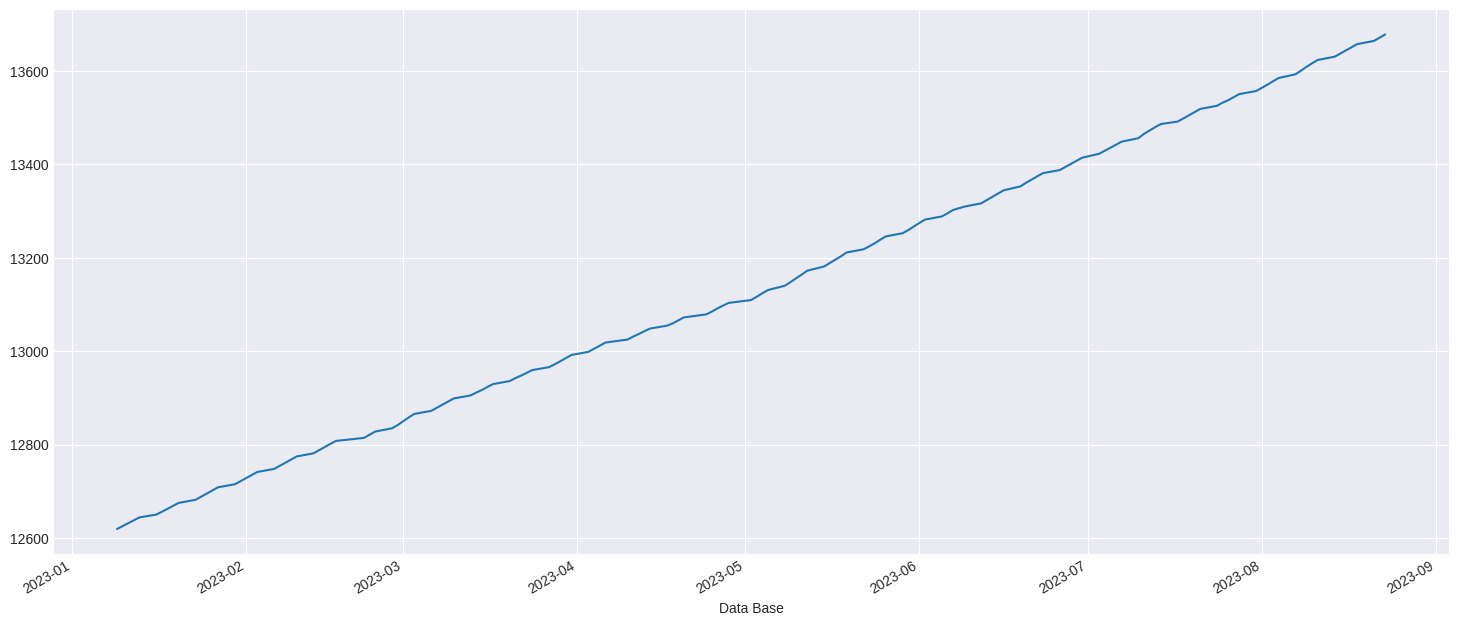

In [ ]:
selic2026['PU Base Manha'].plot();

In [ ]:
selic2029 = titulos.loc[('Tesouro Selic', '2029-03-01')]
selic2029

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2023-01-09,0.17,0.18,12534.73,12520.60,12520.60
2023-01-10,0.17,0.18,12541.33,12527.20,12527.20
2023-01-11,0.17,0.18,12547.41,12533.27,12533.27
2023-01-12,0.17,0.18,12553.33,12539.19,12539.19
2023-01-13,0.17,0.18,12559.41,12545.26,12545.26
2023-01-16,0.17,0.18,12565.42,12551.27,12551.27
2023-01-17,0.18,0.19,12570.66,12556.51,12556.51
2023-01-18,0.18,0.19,12576.98,12562.83,12562.83
2023-01-19,0.18,0.19,12583.15,12569.00,12569.00


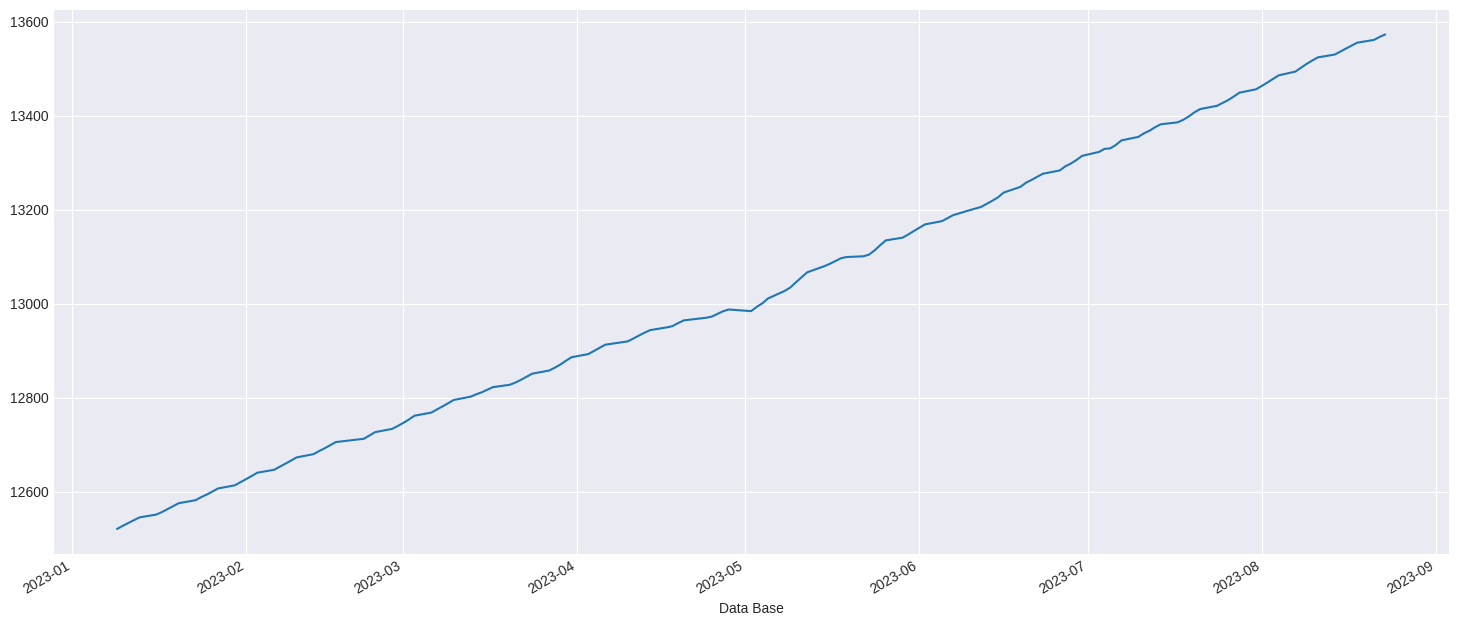

In [ ]:
selic2029['PU Base Manha'].plot();

###2.3 Pré-fixado 2026

In [ ]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2026
pre2022 = titulos.loc[('Tesouro Prefixado', '2022-01-01')]
pre2022

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,7.64,7.76,807.46,804.85,804.61
2019-02-04,7.61,7.73,808.35,805.74,805.50
2019-02-05,7.65,7.77,807.72,805.11,804.87
2019-02-06,7.71,7.83,806.65,804.06,803.82
2019-02-07,7.80,7.92,804.94,802.36,802.12
2019-02-08,7.79,7.91,805.40,802.82,802.58
2019-02-11,7.90,8.02,803.27,800.71,800.46
2019-02-12,7.84,7.96,804.80,802.23,801.99
2019-02-13,7.75,7.87,806.98,804.40,804.16


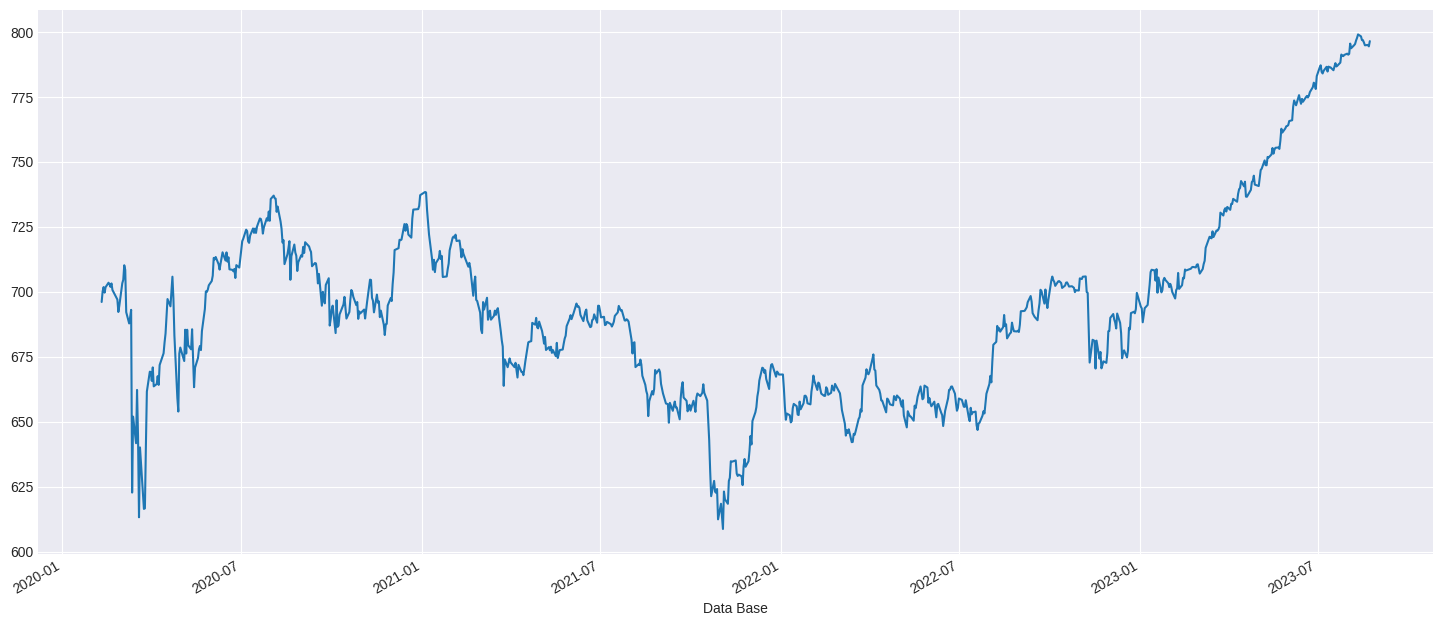

In [ ]:
pre2026['PU Compra Manha'].plot();

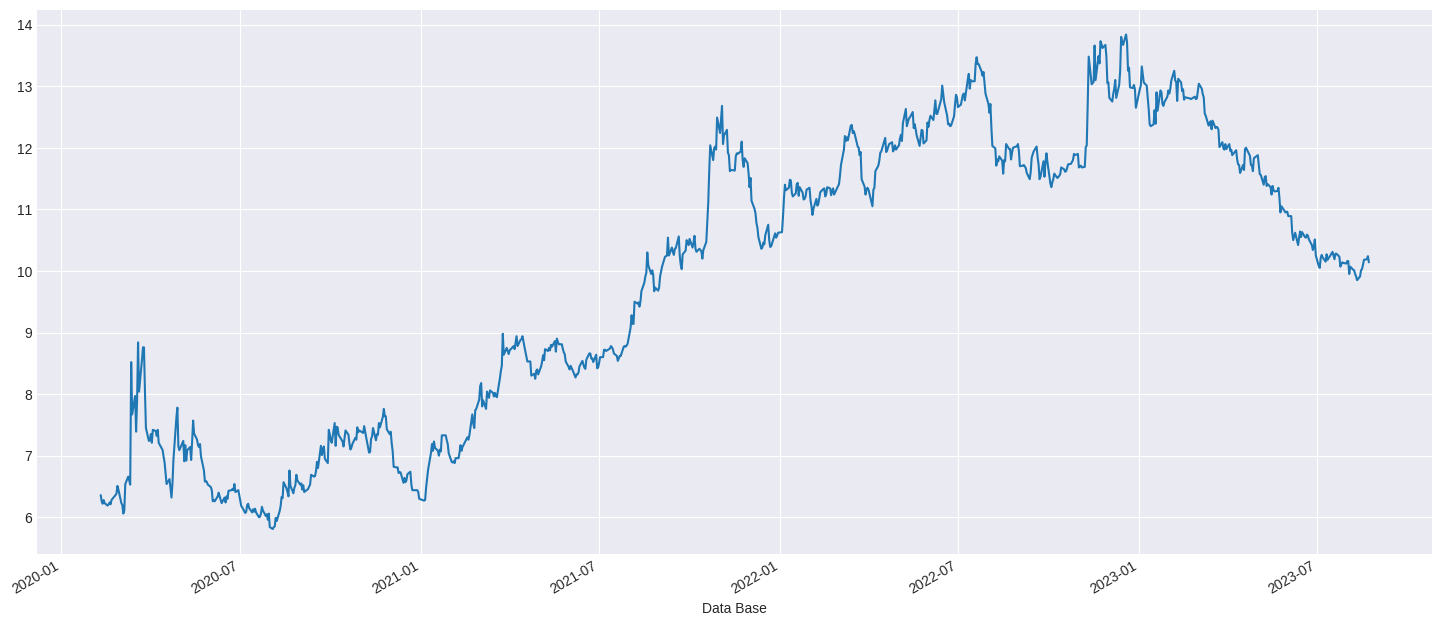

In [ ]:
pre2026['Taxa Compra Manha'].plot();

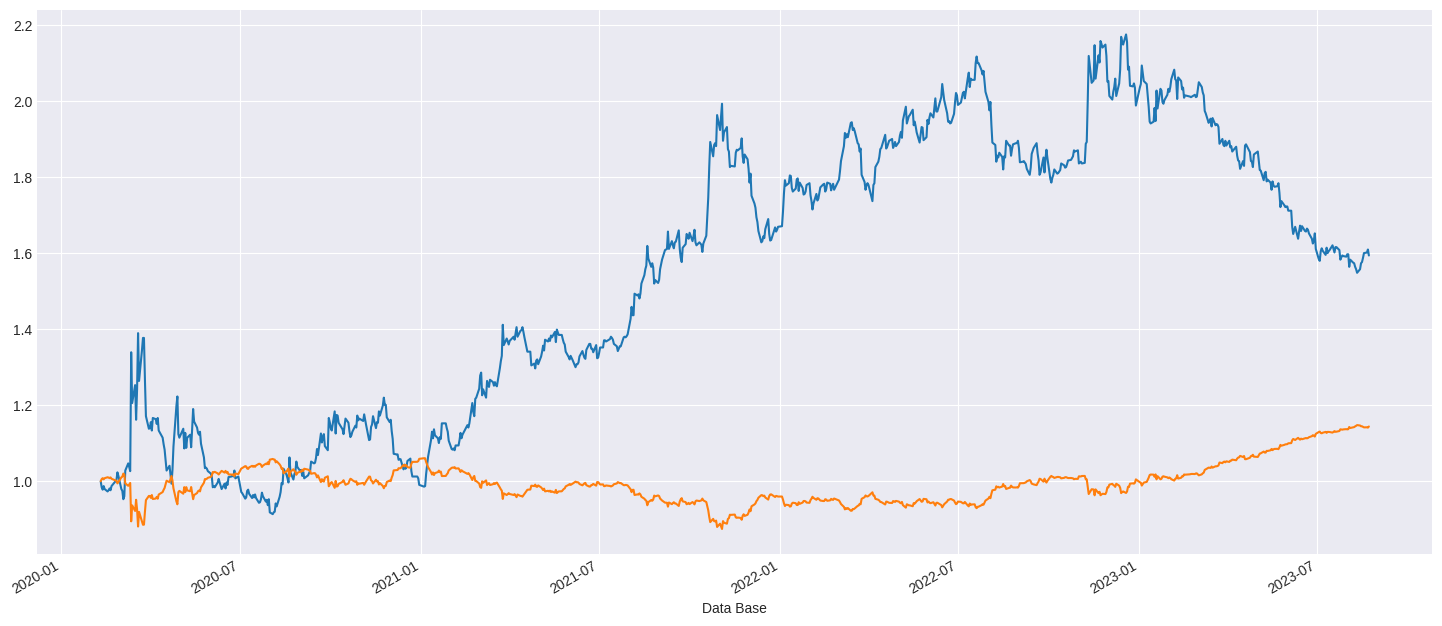

In [ ]:
(pre2026['Taxa Compra Manha'] / pre2026['Taxa Compra Manha'].iloc[0]).plot();
(pre2026['PU Compra Manha'] / pre2026['PU Compra Manha'].iloc[0]).plot();

###2.4 Pré-fixado 2029

In [ ]:
# @title
pre2029 = titulos.loc[('Tesouro Prefixado', '2029-01-01')]
pre2029

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2022-02-21,11.55,11.67,474.03,470.36,470.36
2022-02-22,11.41,11.53,478.32,474.61,474.61
2022-02-23,11.47,11.59,476.77,473.08,473.08
2022-02-24,11.57,11.69,474.07,470.40,470.40
2022-02-25,11.45,11.57,477.77,474.07,474.07
2022-03-02,11.56,11.68,474.77,471.10,471.10
2022-03-03,11.71,11.83,470.65,467.02,467.02
2022-03-04,11.76,11.88,469.43,465.81,465.81
2022-03-07,11.98,12.10,463.40,459.83,459.83


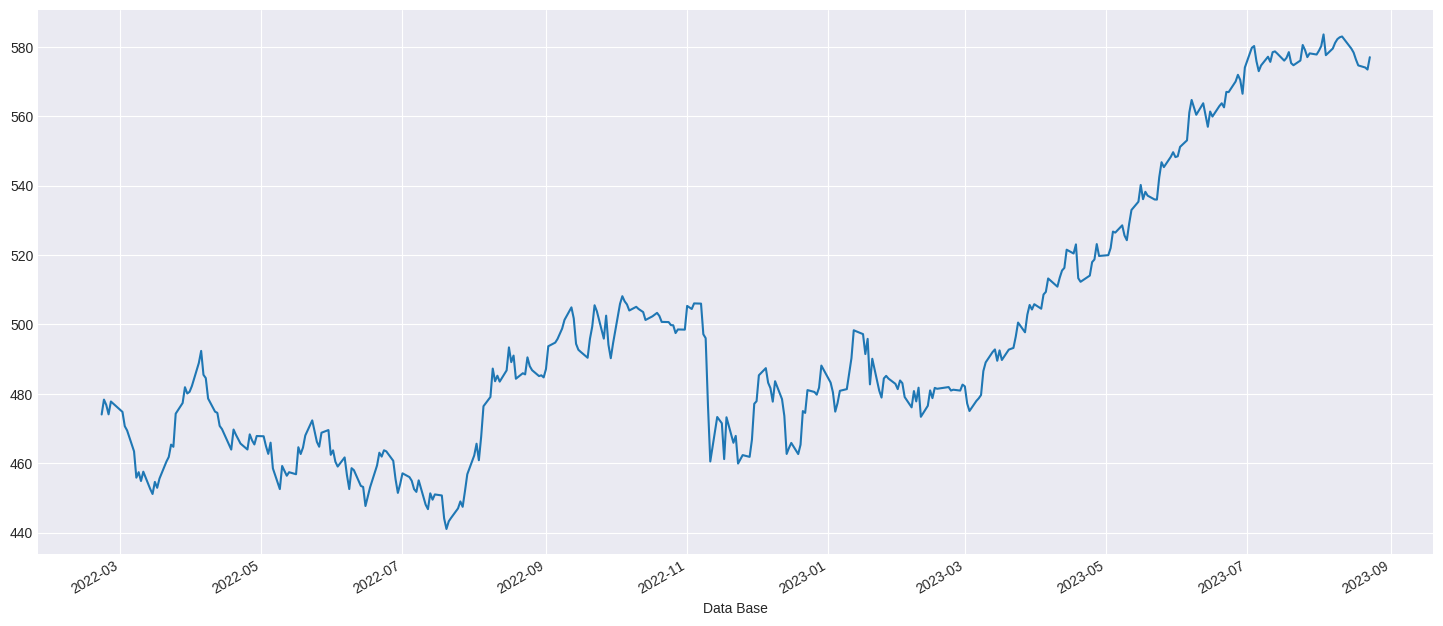

In [ ]:
pre2029['PU Compra Manha'].plot();

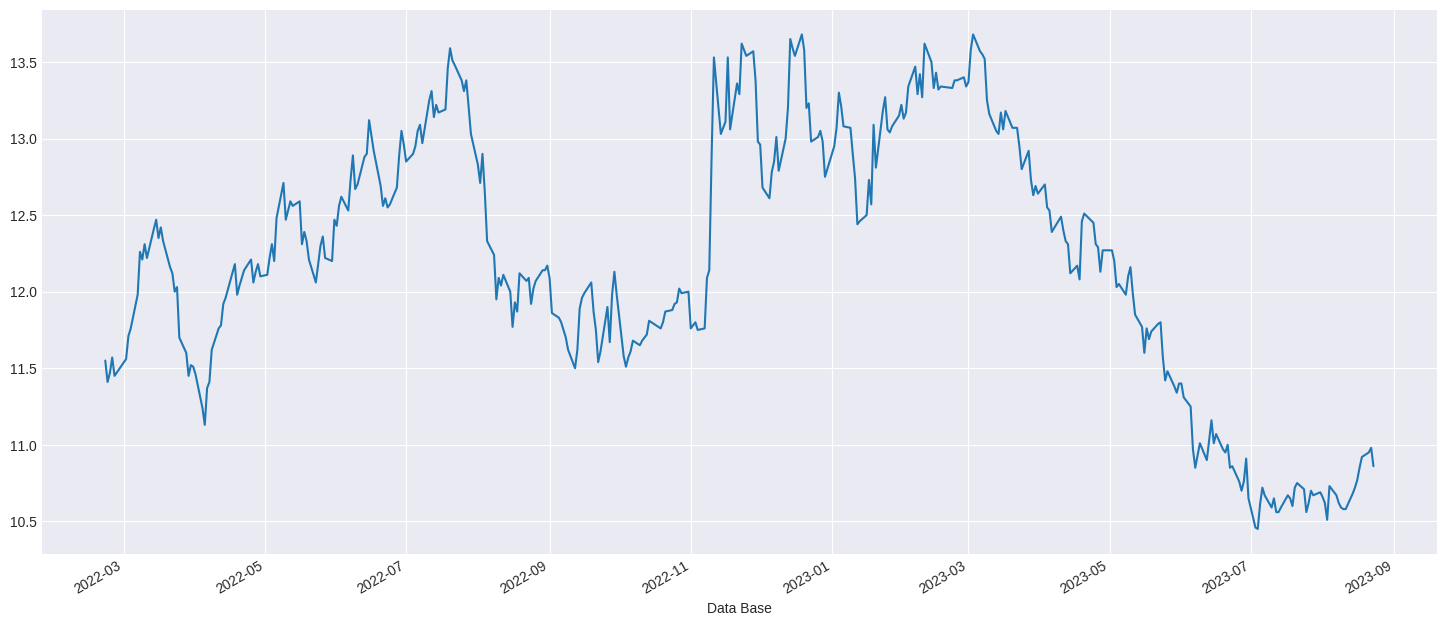

In [ ]:
pre2029['Taxa Compra Manha'].plot();

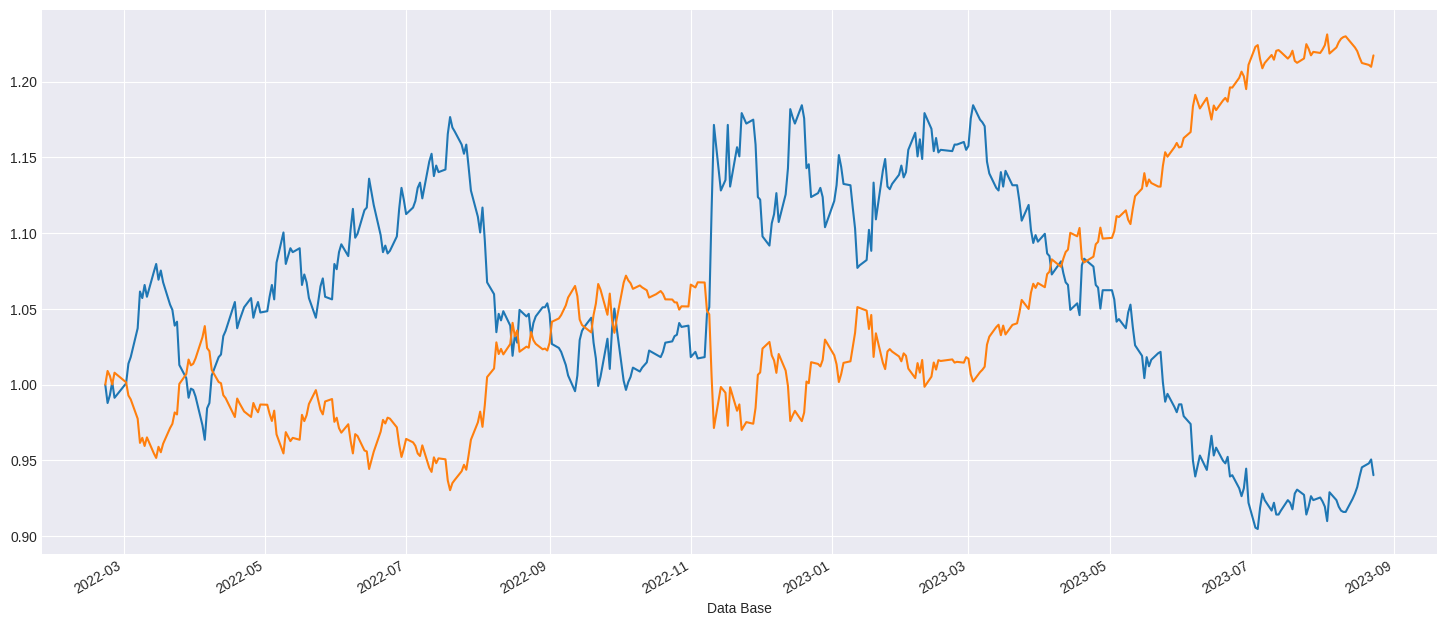

In [ ]:
(pre2029['Taxa Compra Manha'] / pre2029['Taxa Compra Manha'].iloc[0]).plot();
(pre2029['PU Compra Manha'] / pre2029['PU Compra Manha'].iloc[0]).plot();

###2.5 Pré-fixado 2033 com Juros Semestrais

In [ ]:
pre2033 = titulos.loc[('Tesouro Prefixado com Juros Semestrais', '2033-01-01')]
pre2033

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2022-02-21,11.66,11.78,918.87,912.00,912.00
2022-02-22,11.52,11.64,926.92,919.96,919.96
2022-02-23,11.58,11.70,924.03,917.11,917.11
2022-02-24,11.68,11.80,919.00,912.14,912.14
2022-02-25,11.55,11.67,926.48,919.54,919.54
2022-03-02,11.58,11.70,925.24,918.32,918.32
2022-03-03,11.77,11.89,915.36,908.55,908.55
2022-03-04,11.77,11.89,915.76,908.95,908.95
2022-03-07,12.02,12.14,902.90,896.23,896.23


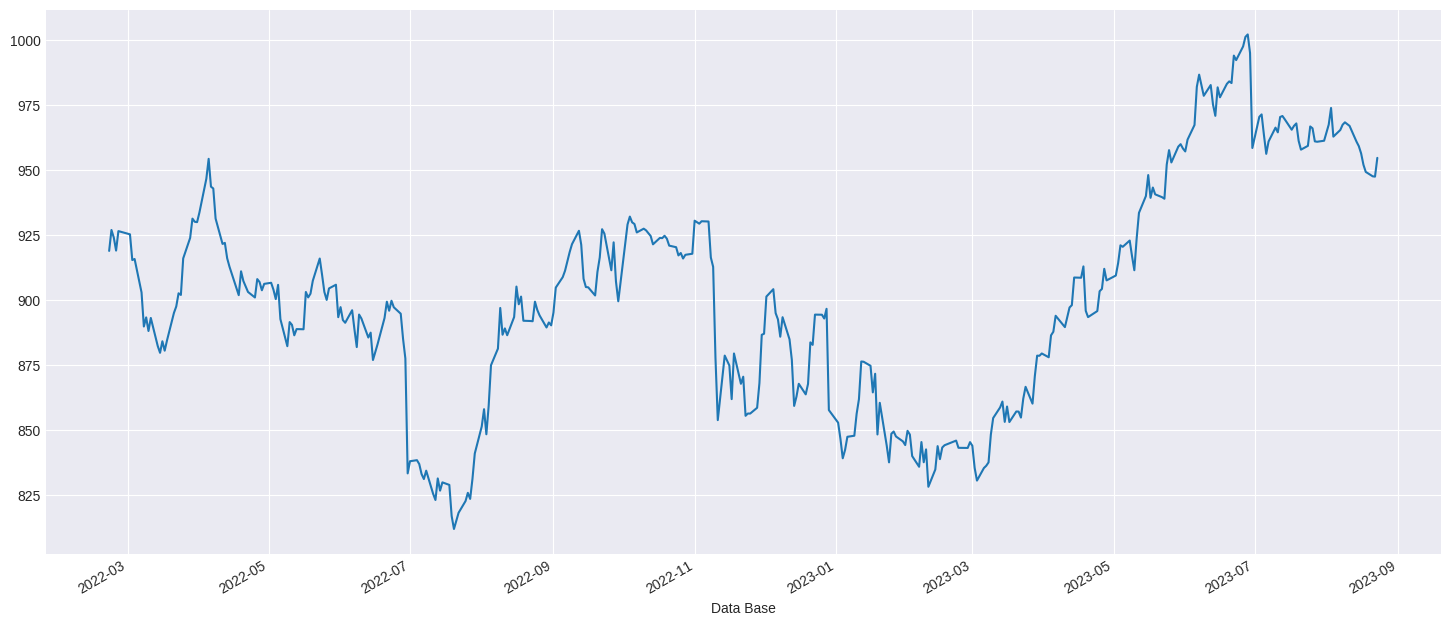

In [ ]:
pre2033['PU Compra Manha'].plot();

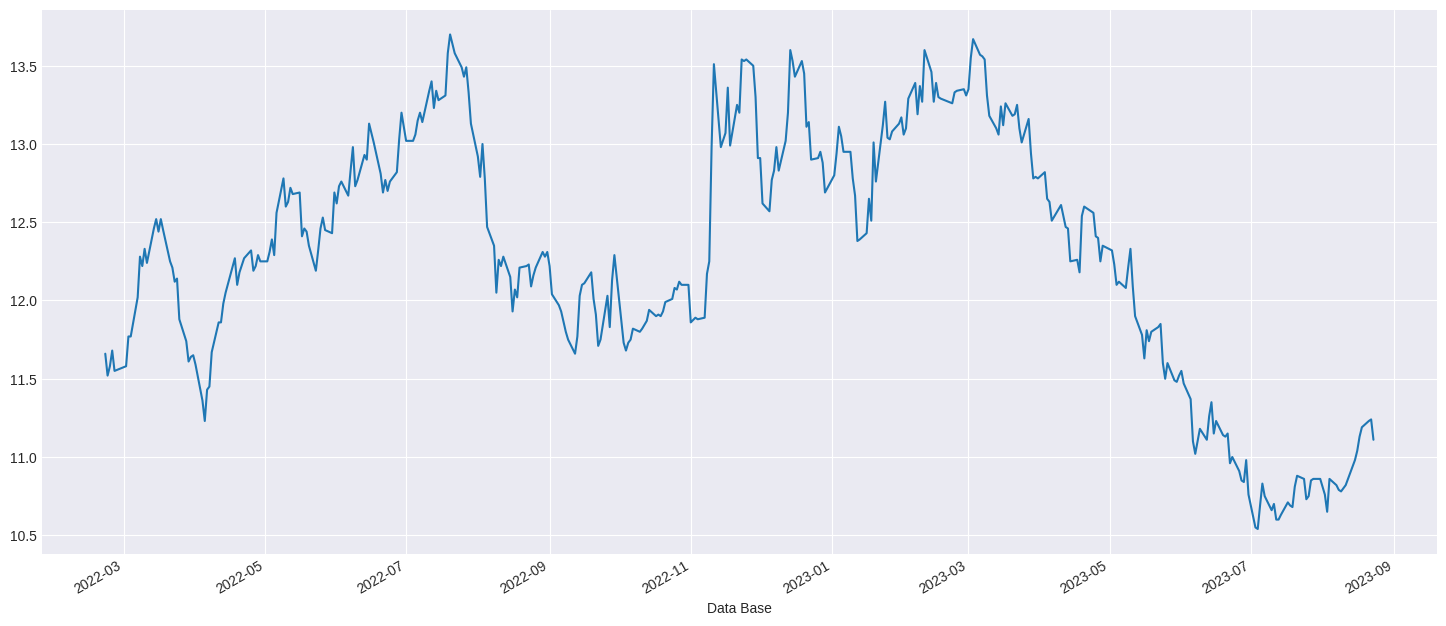

In [ ]:
pre2033['Taxa Compra Manha'].plot();

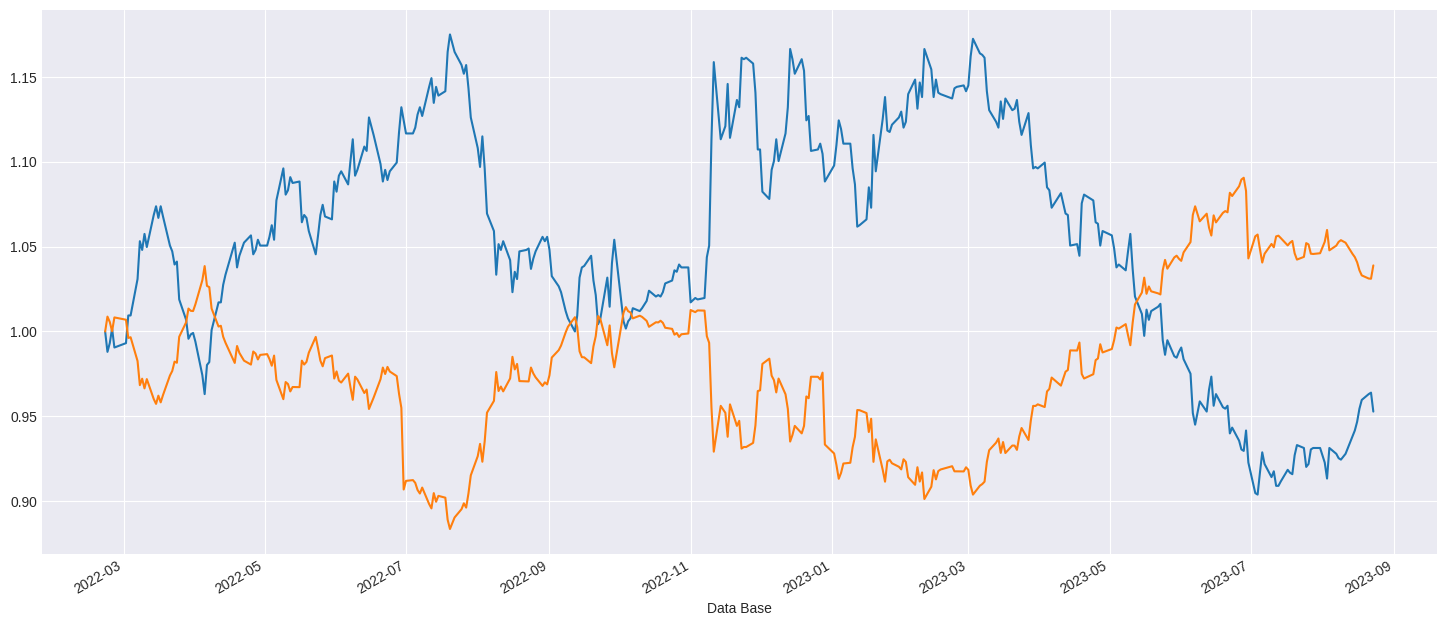

In [ ]:
(pre2033['Taxa Compra Manha'] / pre2033['Taxa Compra Manha'].iloc[0]).plot();
(pre2033['PU Compra Manha'] / pre2033['PU Compra Manha'].iloc[0]).plot();

###2.6 Tesouro IPCA+ 2029

In [ ]:
ipca2029 = titulos.loc[('Tesouro IPCA+', '2029-05-15')]
ipca2029

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2023-01-09,6.26,6.38,2725.84,2705.45,2705.45
2023-01-10,6.20,6.32,2741.12,2720.45,2720.45
2023-01-11,6.13,6.25,2753.74,2732.99,2732.99
2023-01-12,5.95,6.07,2784.57,2763.58,2763.58
2023-01-13,6.01,6.13,2776.87,2754.94,2754.94
2023-01-16,5.99,6.11,2781.28,2760.43,2760.43
2023-01-17,6.01,6.13,2779.08,2758.27,2758.27
2023-01-18,5.93,6.05,2793.42,2772.50,2772.50
2023-01-19,6.19,6.31,2751.82,2731.24,2731.24


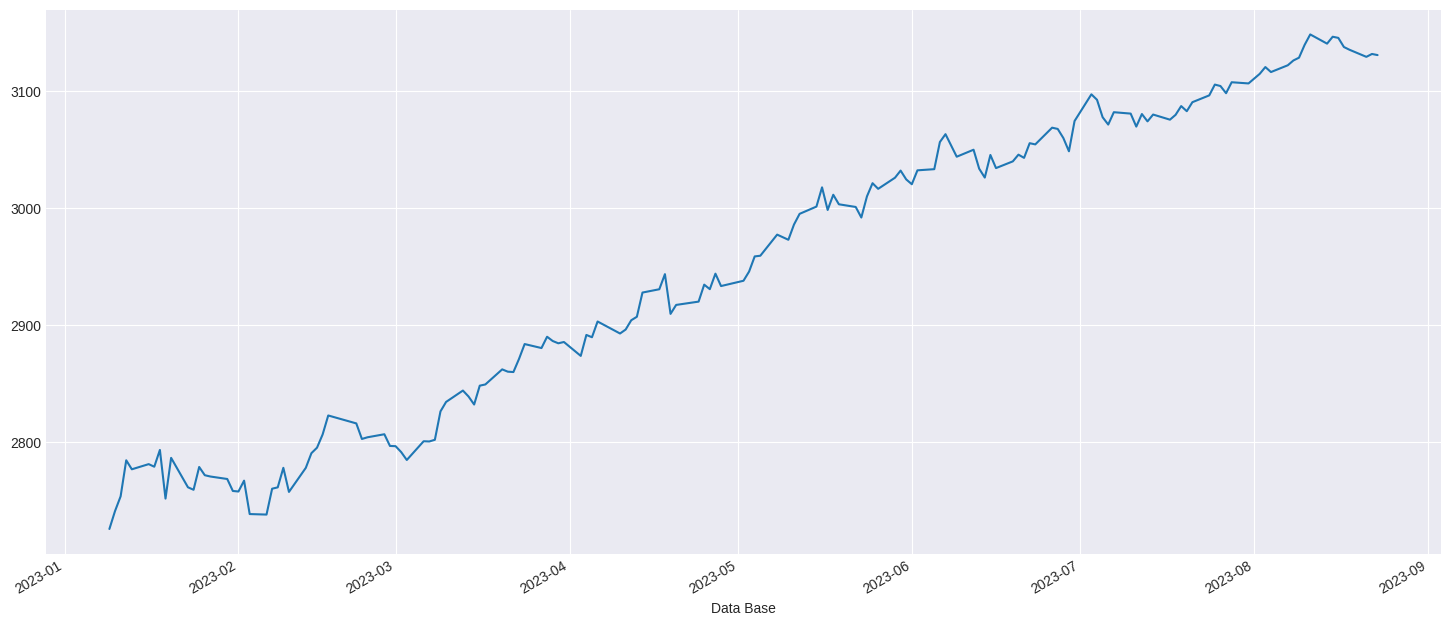

In [ ]:
ipca2029['PU Compra Manha'].plot();

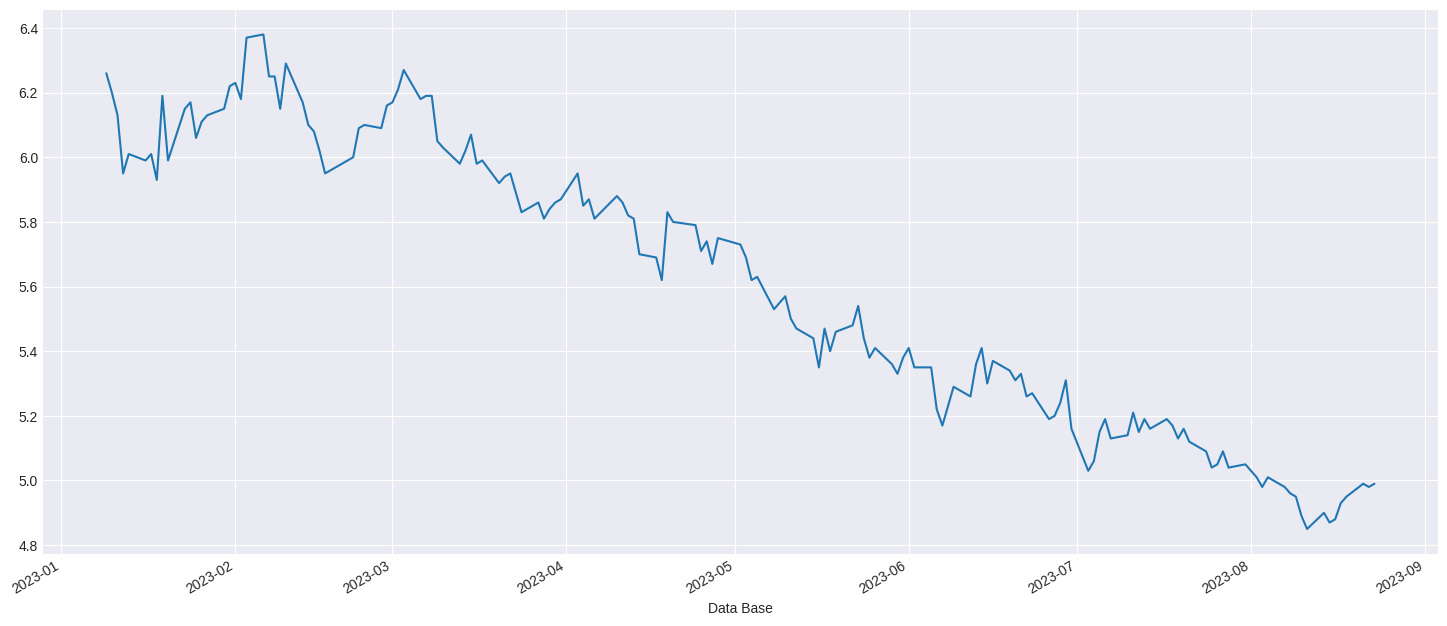

In [ ]:
ipca2029['Taxa Compra Manha'].plot();

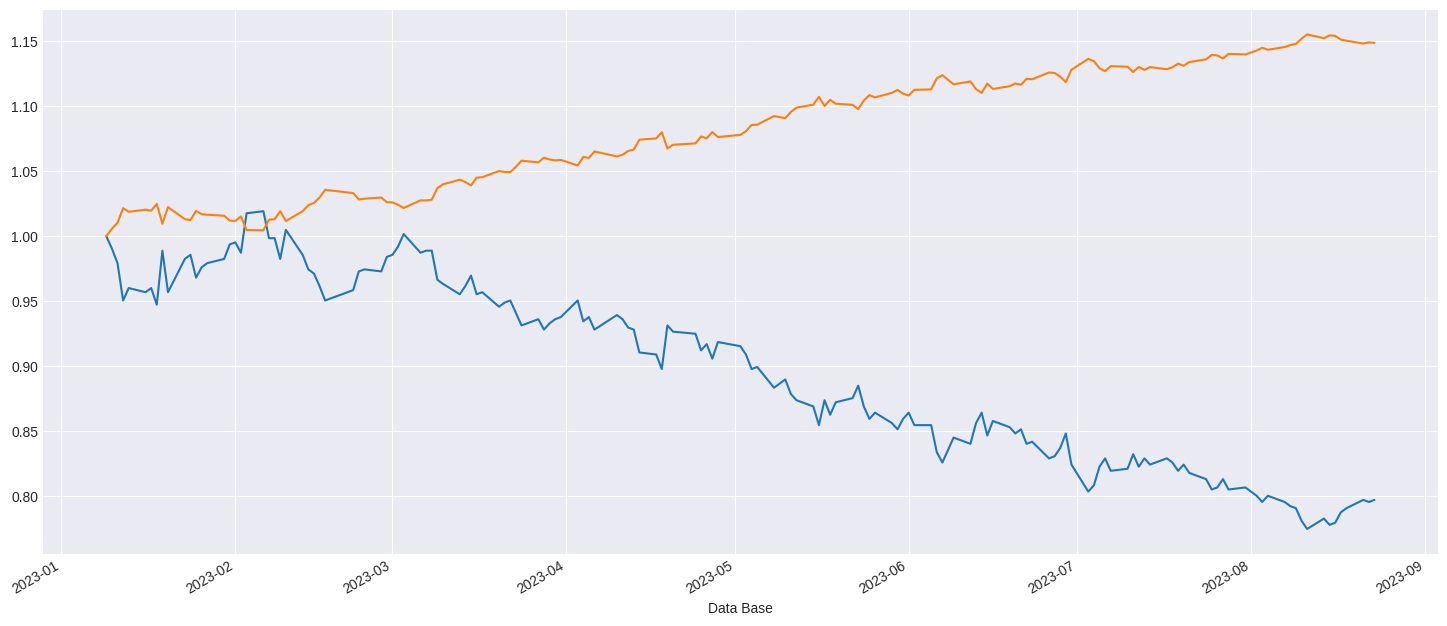

In [ ]:
(ipca2029['Taxa Compra Manha'] / ipca2029['Taxa Compra Manha'].iloc[0]).plot();
(ipca2029['PU Compra Manha'] / ipca2029['PU Compra Manha'].iloc[0]).plot();

###2.7 Tesouro IPCA+ 2035

In [ ]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2010-03-08,6.23,6.33,415.52,405.82,405.61
2010-03-09,6.25,6.35,413.78,404.12,403.91
2010-03-10,6.25,6.35,413.99,404.33,404.12
2010-03-11,6.25,6.35,414.20,404.54,404.33
2010-03-12,6.27,6.37,412.69,403.07,402.82
2010-03-15,6.28,6.38,411.87,402.27,402.12
2010-03-16,6.27,6.37,413.00,403.37,403.22
2010-03-17,6.26,6.36,414.13,404.47,404.32
2010-03-18,6.26,6.36,414.28,404.62,404.47


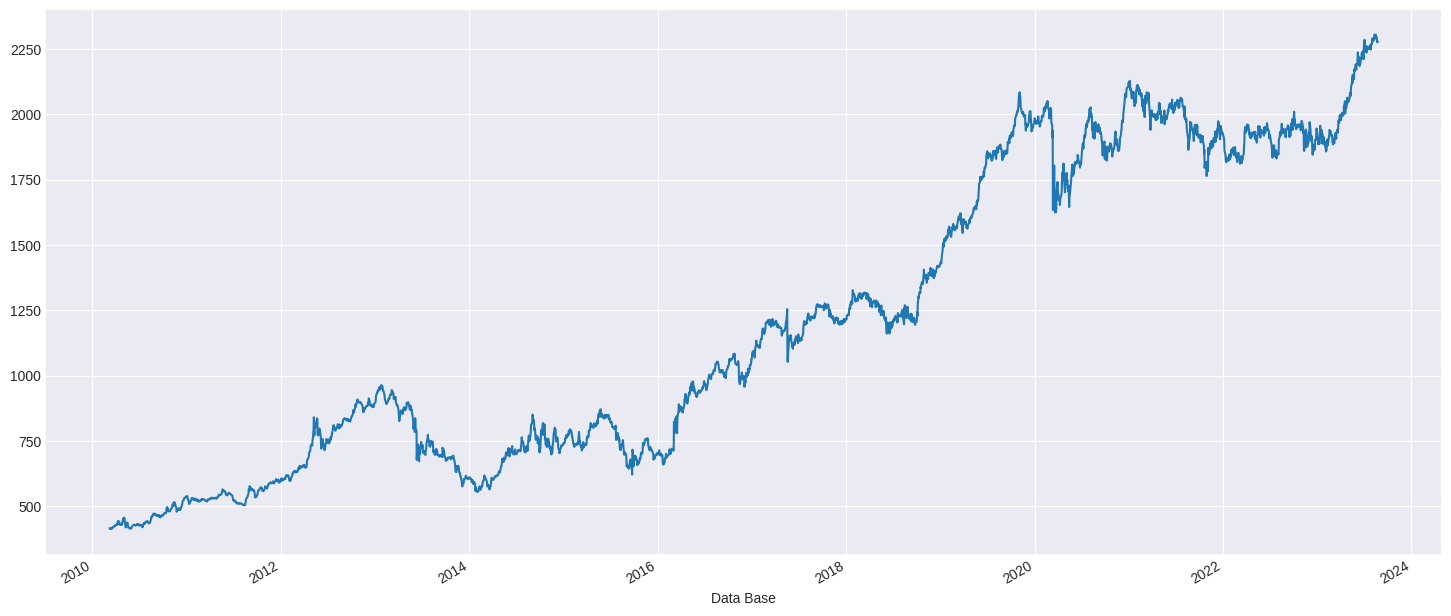

In [ ]:
ipca2035['PU Compra Manha'].plot();

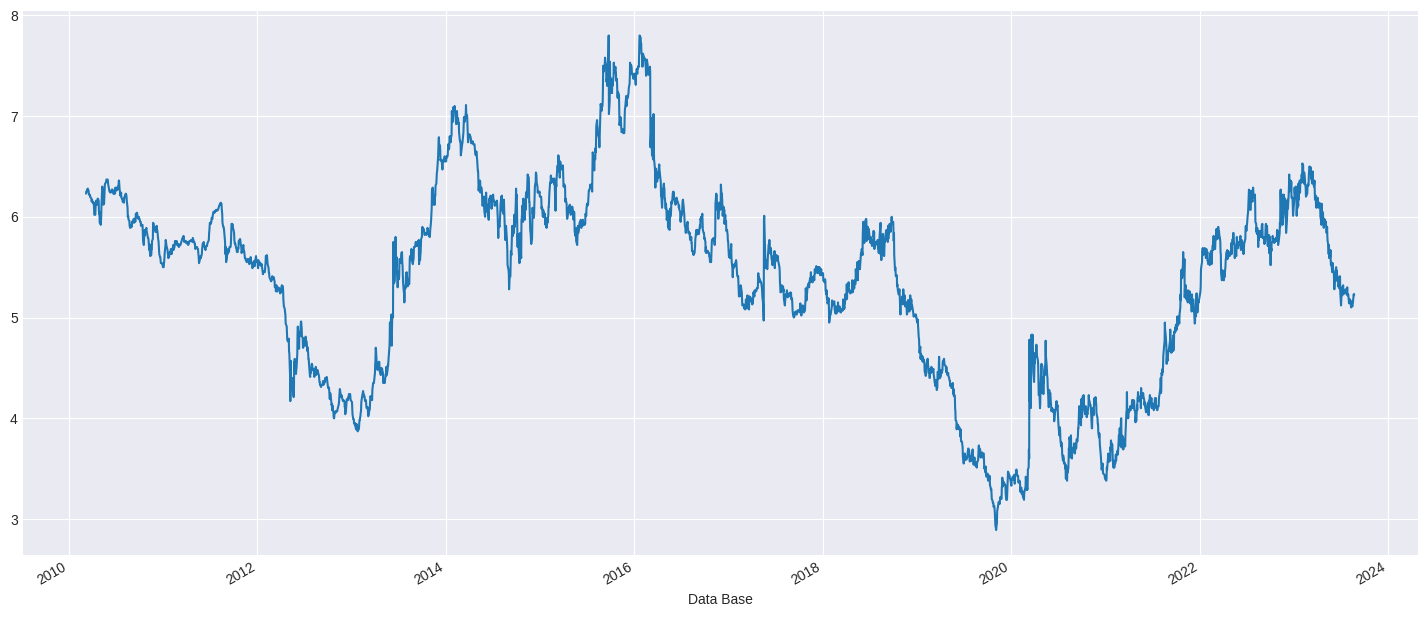

In [ ]:
ipca2035['Taxa Compra Manha'].plot();

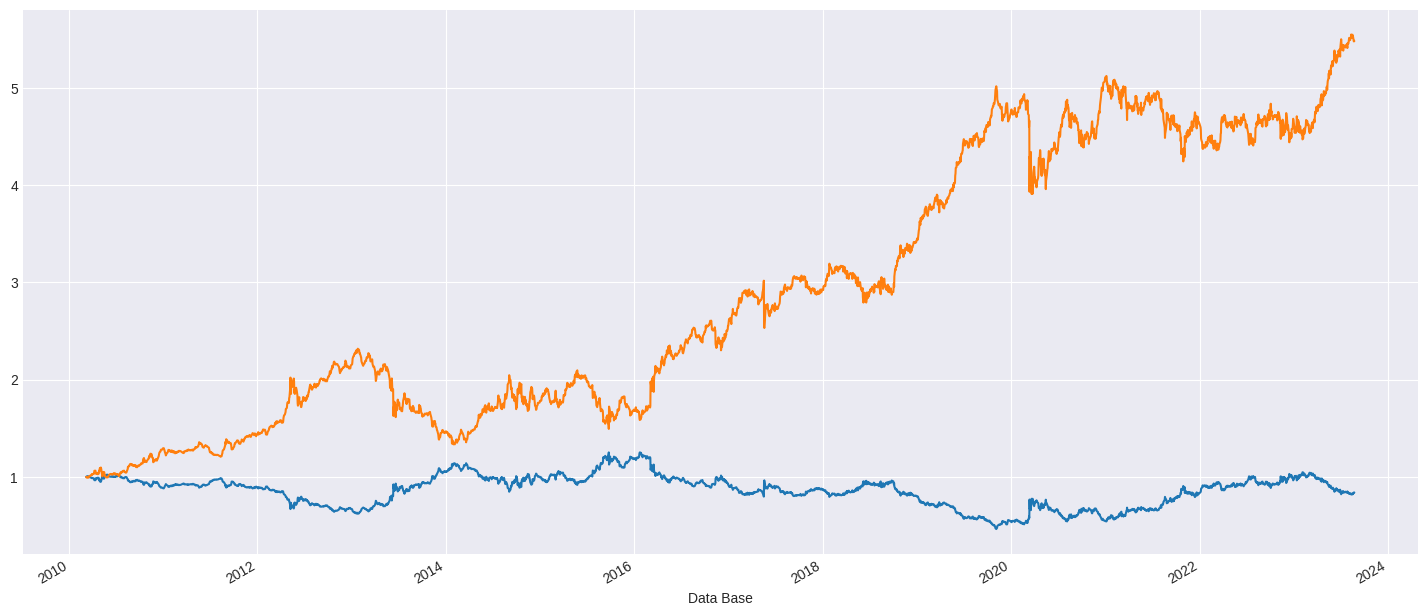

In [ ]:
(ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot();
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot();

###2.8 Tesouro IPCA+ 2045

In [ ]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2017-02-08,5.34,5.46,685.78,664.14,663.92
2017-02-09,5.27,5.39,698.96,676.90,676.67
2017-02-10,5.21,5.33,710.67,688.23,687.84
2017-02-13,5.21,5.33,710.90,688.46,688.23
2017-02-14,5.22,5.34,709.23,686.85,686.62
2017-02-15,5.22,5.34,709.49,687.10,686.85
2017-02-16,5.25,5.37,704.09,681.88,681.62
2017-02-17,5.32,5.44,691.53,669.73,669.25
2017-02-20,5.27,5.39,701.09,678.98,678.73


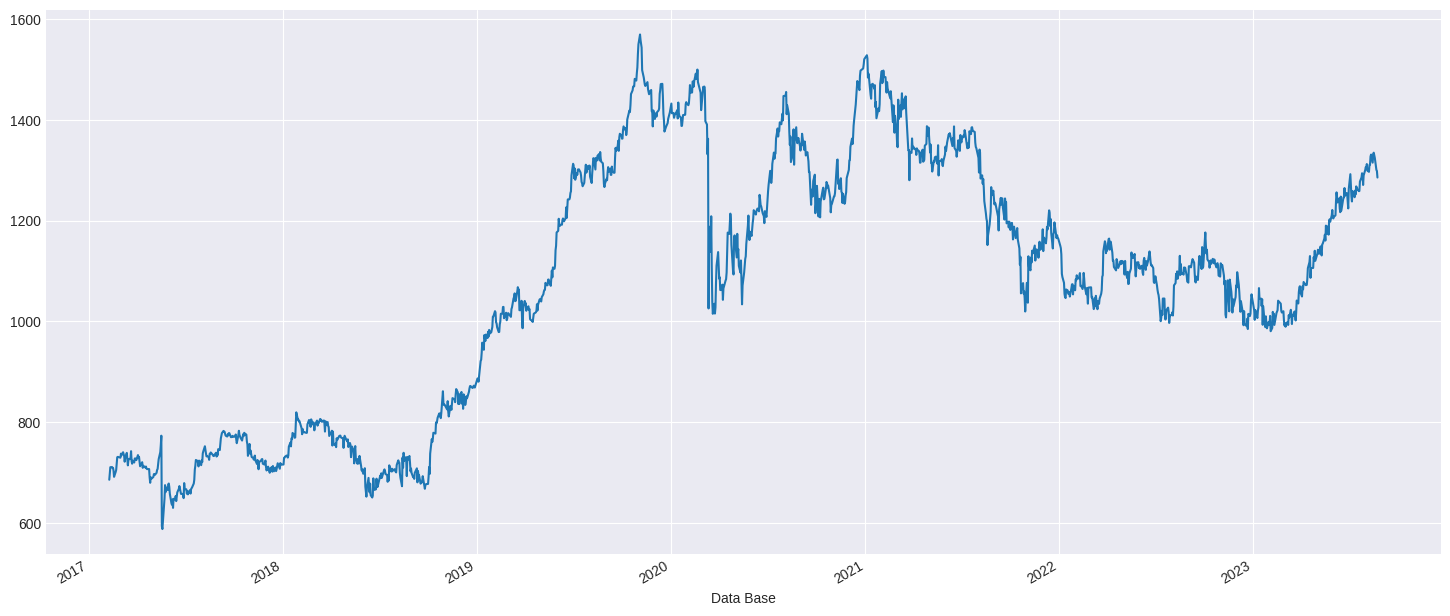

In [ ]:
ipca2045['PU Compra Manha'].plot();

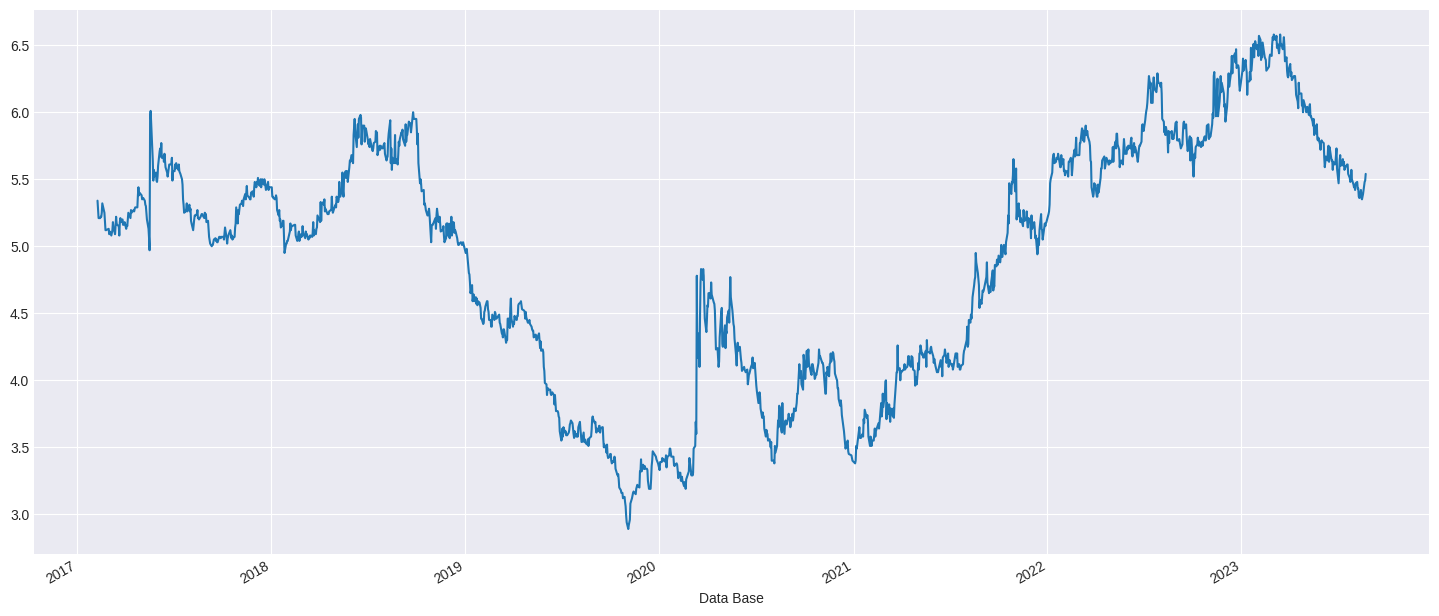

In [ ]:
ipca2045['Taxa Compra Manha'].plot();

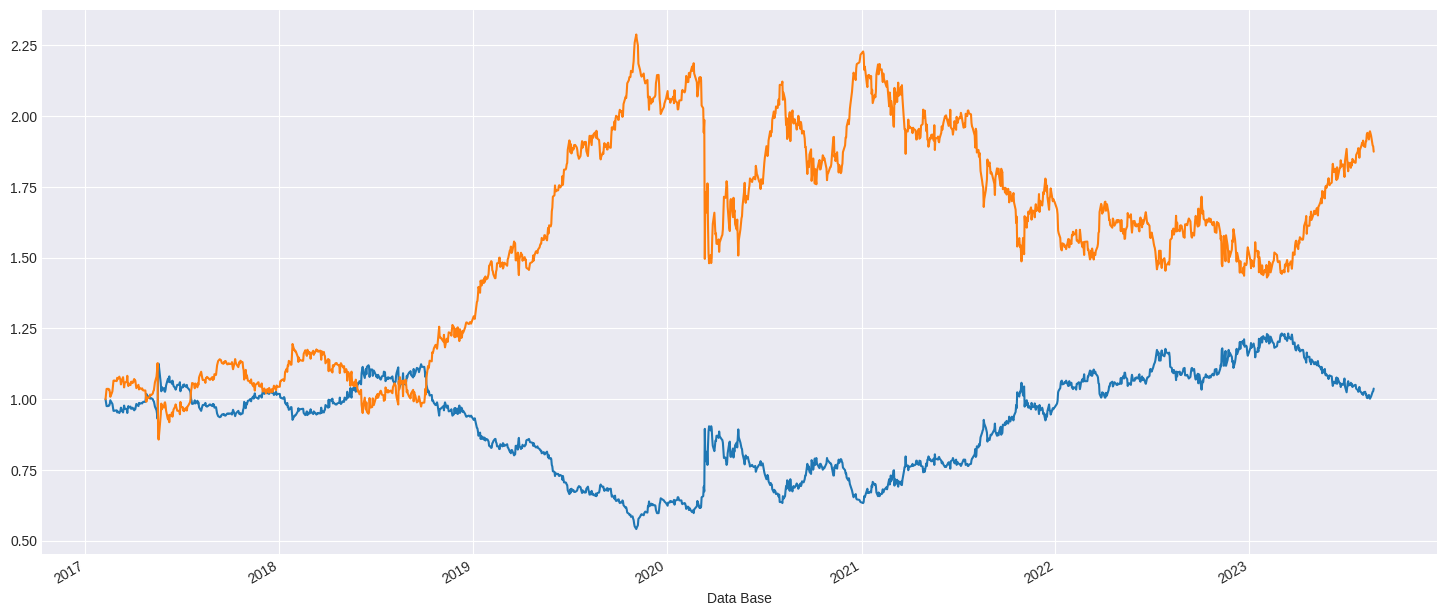

In [ ]:
(ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot();
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot();

###2.9 Tesouro IPCA+ 2055 com Juros Semestrais

In [ ]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,3.42,3.54,5063.37,4956.73,4955.71
2020-02-11,3.36,3.48,5119.00,5010.64,5009.63
2020-02-12,3.36,3.48,5120.02,5011.66,5010.64
2020-02-13,3.40,3.52,5084.54,4977.32,4976.30
2020-02-14,3.37,3.49,5113.38,5005.31,5003.81
2020-02-17,3.34,3.46,5141.86,5032.93,5032.01
2020-02-18,3.37,3.49,5115.22,5007.16,5006.23
2020-02-19,3.37,3.49,5116.14,5008.08,5007.16
2020-02-20,3.34,3.46,5144.62,5035.70,5034.77


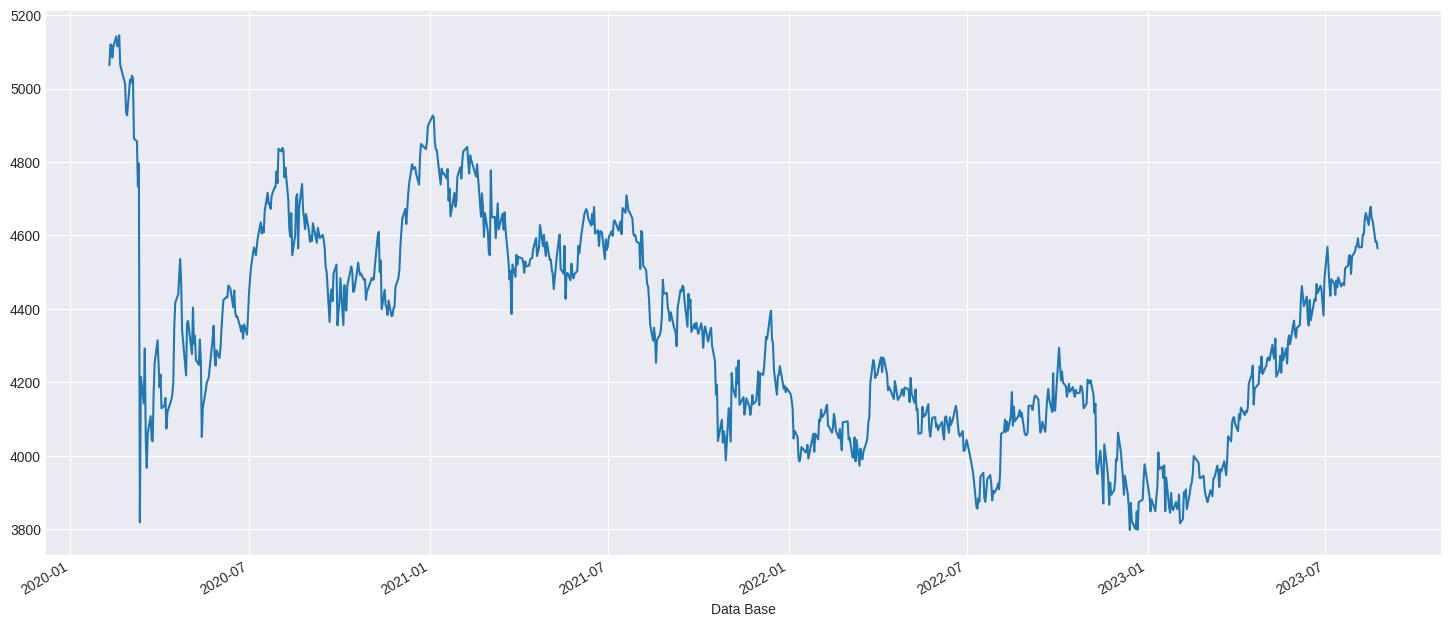

In [ ]:
ipca2055['PU Compra Manha'].plot();

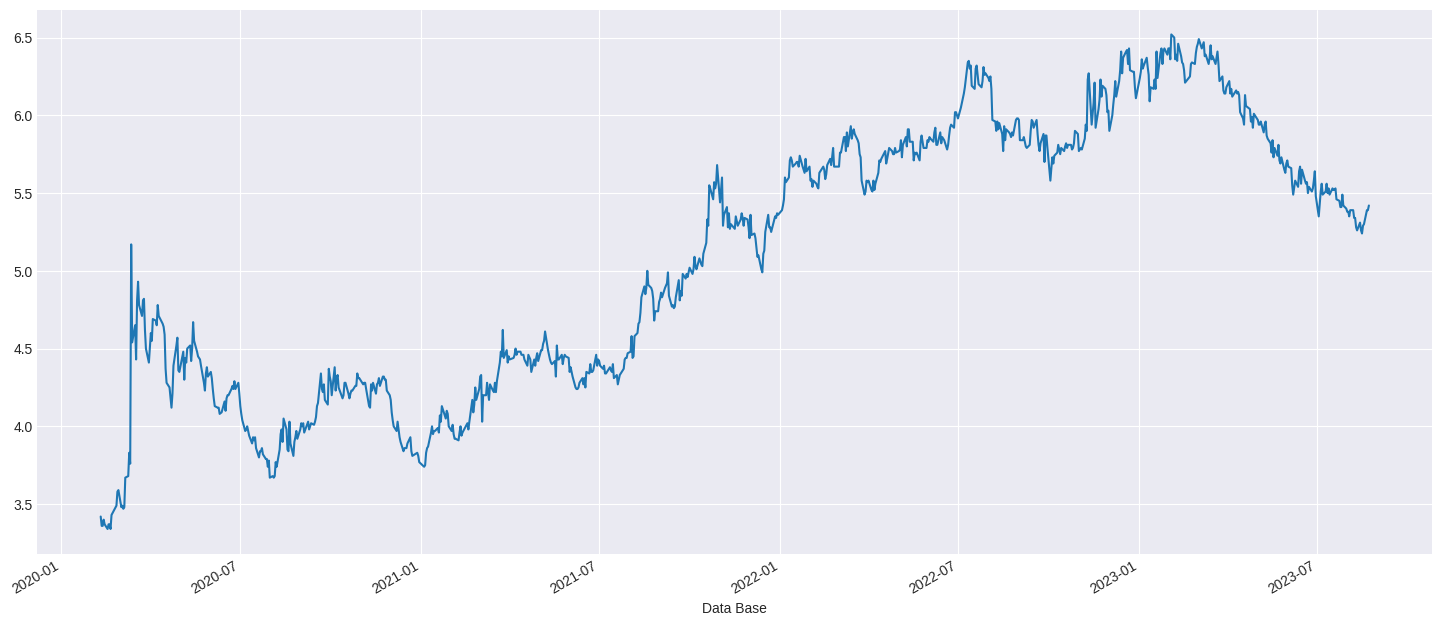

In [ ]:
ipca2055['Taxa Compra Manha'].plot();

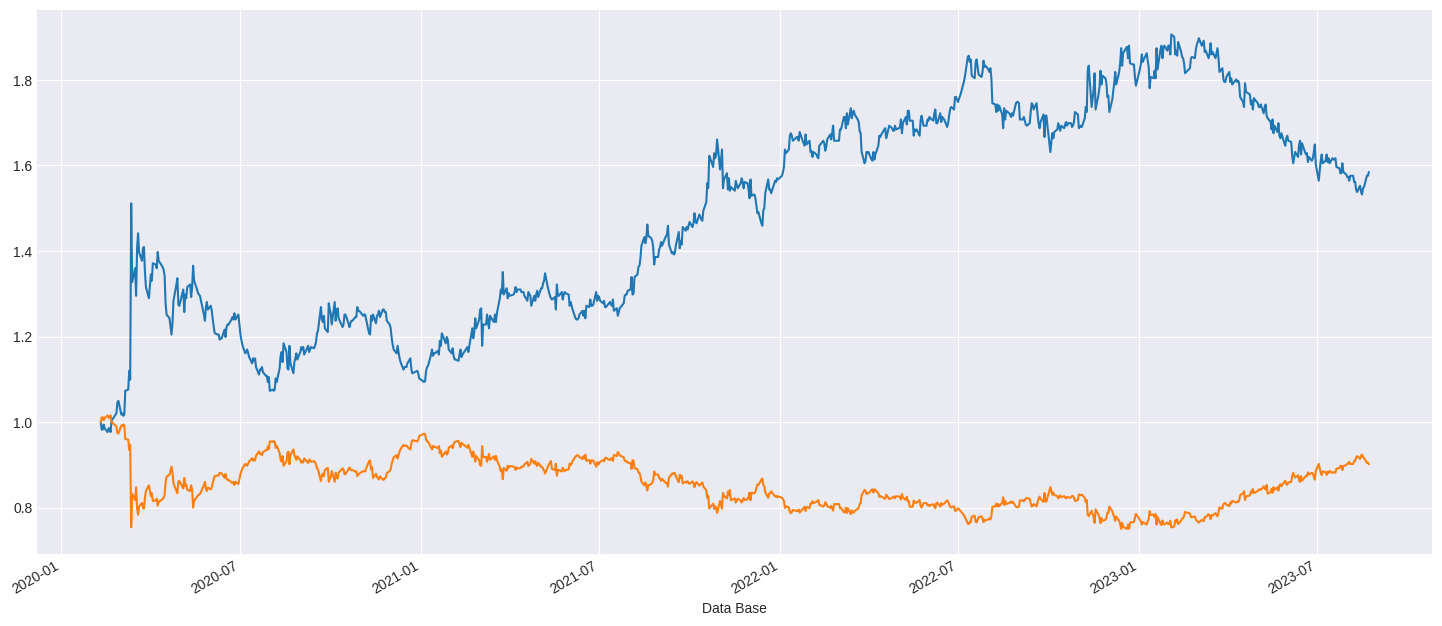

In [ ]:
(ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot();
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot();

##3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto.

###3.1 Buscando Dados

In [ ]:
vendas = busca_vendas_tesouro()

In [ ]:
vendas.sort_index(inplace=True)
vendas

PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
                                    2023-08-09   3269.745017      194.17   
                                    2023-08-10   3274.217156      146.53   
                                    2023-08-11   3280.013108      160.97   
                                    2023-08-14   3286.898059      187.56   
                                    2023-08-15   3280.731141       96.11   
...                                                      ...         ...   
Tesouro Selic  2029-03-01           2023-08-09  13516.132660     4134.68   
                                    2023-08-10  13524.410738     3296.67   
                                    2023-08-11  13531.650415     3573.41   
                                    2023-08-14  13538.292759     3366.21   
                                    2023-08-15  13544.272052     4200.37   
                                    2023-08-16  13550.469782     3957.47   
                                    2023-08-17  13556.967283     3940.22   
                                    2023-08-18  13563.183444     3476.04   
                                    2023-08-21  13569.472302     3989.14   
                                    2023-08-22  13575.470676     4116.86   

                                                      Valor  
Tipo Titulo    Vencimento do Titulo Data Venda               
Tesouro Educa+ 2030-12-15           2023-08-02   1077899.46  
                                    2023-08-03    596298.59  
                                    2023-08-04    513418.42  
                                    2023-08-07   1176050.04  
                                    2023-08-08    743454.32  
                                    2023-08-09    634886.38  
                                    2023-08-10    479771.03  
                                    2023-08-11    527983.70  
                                    2023-08-14    616490.59  
                                    2023-08-15    315311.06  
...                                                     ...  
Tesouro Selic  2029-03-01           2023-08-09  55884883.38  
                                    2023-08-10  44585519.14  
                                    2023-08-11  48354134.90  
                                    2023-08-14  45572736.46  
                                    2023-08-15  56890953.99  
                                    2023-08-16  53625577.64  
                                    2023-08-17  53417433.62  
                                    2023-08-18  47146168.17  
                                    2023-08-21  54130524.73  
                                    2023-08-22  55888312.20  

[73038 rows x 3 columns]

###3.2 Gráficos

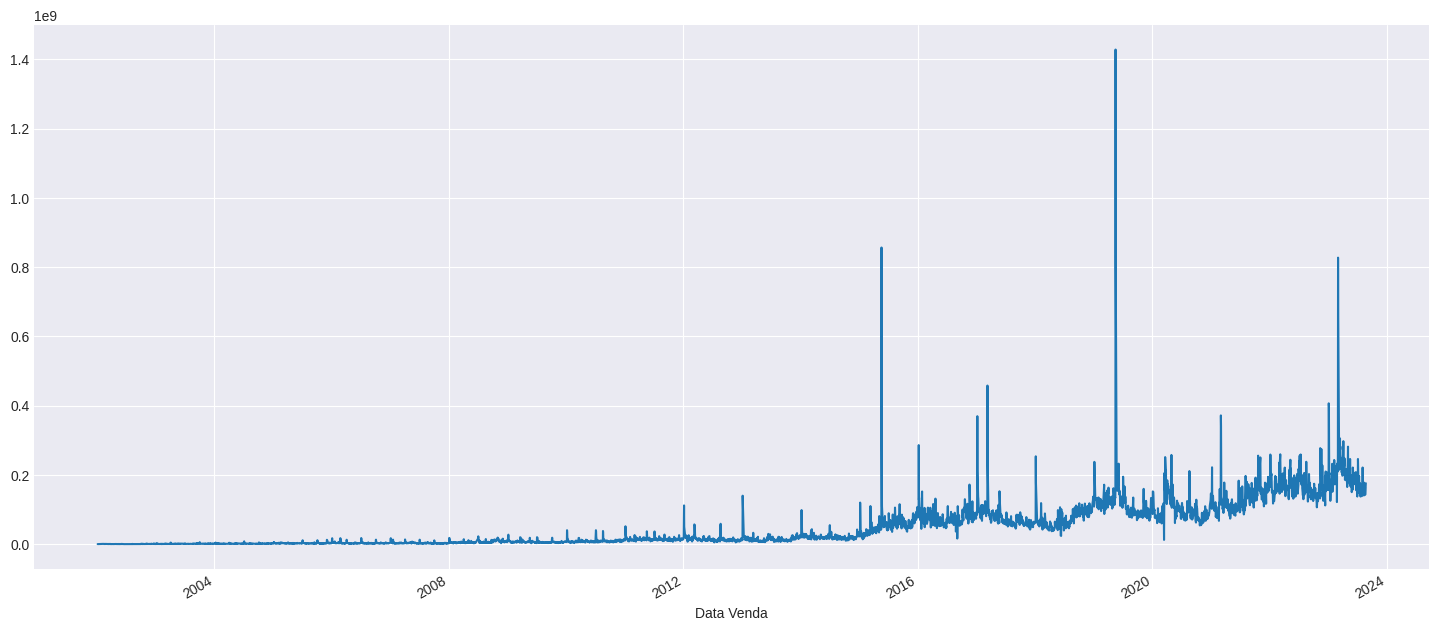

In [ ]:
vendas['Valor'].groupby('Data Venda').sum().plot();

##4. Recompras Tesouro Direto

Esse conjunto da dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo.

###4.1 Buscando Dados

In [ ]:
recompras = busca_recompras_tesouro()

In [ ]:
recompras.sort_index(inplace=True)
recompras

Quantidade  \
Tipo Titulo                        Vencimento do Titulo Data Resgate               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00   
                                                        2005-02-03          1.00   
                                                        2005-03-03          2.00   
                                                        2005-03-10          1.00   
                                                        2005-03-24          0.20   
                                                        2005-03-31          0.60   
                                                        2005-04-14          3.60   
                                                        2005-04-22         36.00   
                                                        2005-06-02          6.40   
                                   2005-12-01           2005-01-06        141.20   
...                                                                          ...   
Tesouro Selic                      2029-03-01           2023-08-09       1272.75   
                                                        2023-08-10       1194.54   
                                                        2023-08-11       1054.27   
                                                        2023-08-14       1473.31   
                                                        2023-08-15       1487.07   
                                                        2023-08-16       1414.96   
                                                        2023-08-17       1280.71   
                                                        2023-08-18       1810.09   
                                                        2023-08-21       2157.58   
                                                        2023-08-22       1644.93   

                                                                            Valor  
Tipo Titulo                        Vencimento do Titulo Data Resgate               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13        3545.04  
                                                        2005-02-03        1783.97  
                                                        2005-03-03        3595.96  
                                                        2005-03-10        1803.81  
                                                        2005-03-24         364.14  
                                                        2005-03-31        1098.15  
                                                        2005-04-14        6666.62  
                                                        2005-04-22       66912.84  
                                                        2005-06-02       11999.94  
                                   2005-12-01           2005-01-06      249321.07  
...                                                                           ...  
Tesouro Selic                      2029-03-01           2023-08-09    17194489.93  
                                                        2023-08-10    16146895.63  
                                                        2023-08-11    14258069.41  
                                                        2023-08-14    19934228.58  
                                                        2023-08-15    20129678.91  
                                                        2023-08-16    19162595.29  
                                                        2023-08-17    17352598.81  
                                                        2023-08-18    24536528.20  
                                                        2023-08-21    29259827.18  
                                                        2023-08-22    22318018.08  

[60288 rows x 2 columns]

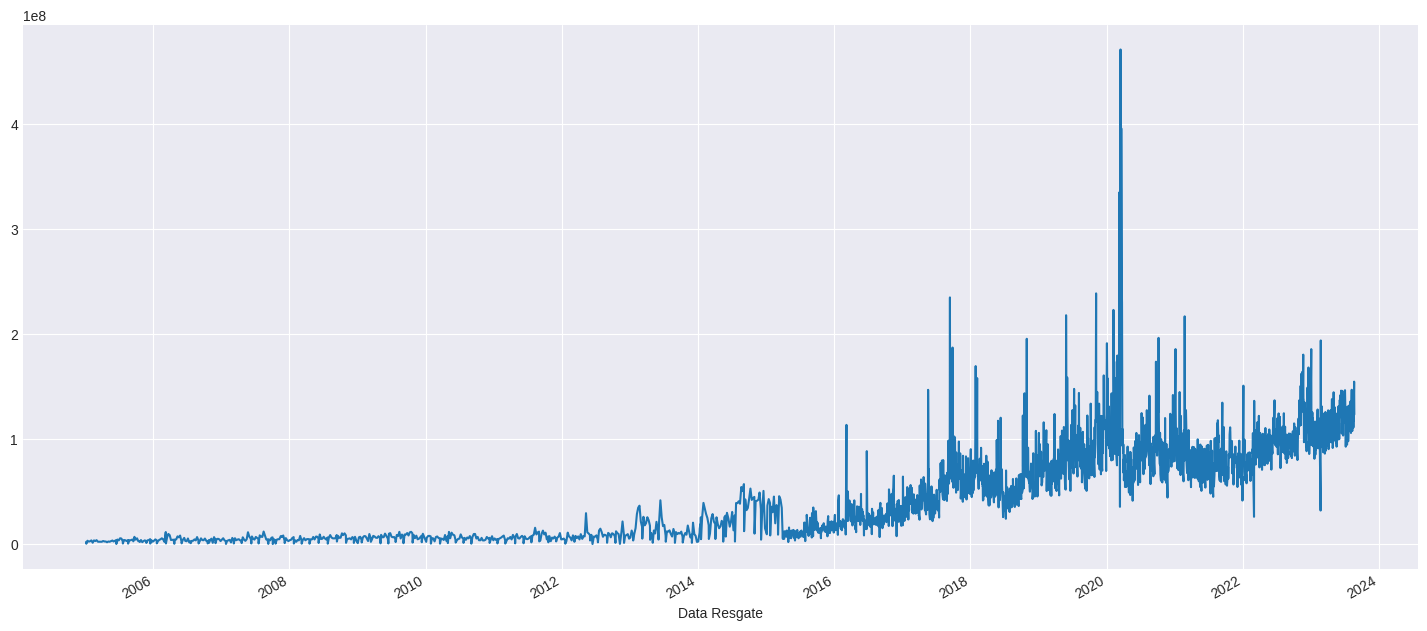

In [ ]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

###4.2 Recompras diárias Tesouro Selic 2025

In [ ]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01')]

In [ ]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [ ]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

In [ ]:
fig = px.bar(data_frame=recompras_selic_semanal,  x=recompras_selic_semanal.index, y='Valor' )
fig.show()

###4.3 Resgastes Tesouro Selic vs Índice Bovespa

In [ ]:
ibov = yf.download('^BVSP')['Adj Close'].resample('W').last().pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
2019-02-24,0.236251,0.003691
2019-03-03,0.423072,-0.033529
2019-03-10,-0.219953,0.008044
2019-03-17,1.231367,0.039553
2019-03-24,0.179772,-0.054490
2019-03-31,0.579274,0.017923
2019-04-07,-0.185600,0.017744
2019-04-14,0.124599,-0.043591
2019-04-21,0.030708,0.018336
2019-04-28,0.232518,0.017531


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [ ]:
selic_ibov.corr()

,Recompra(%),IBOV(%)
Recompra(%),1.000000,-0.205311
IBOV(%),-0.205311,1.000000


In [ ]:
pre2022 = titulos.loc[('Tesouro Prefixado', '2022-01-01')]
pre2022

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,7.64,7.76,807.46,804.85,804.61
2019-02-04,7.61,7.73,808.35,805.74,805.50
2019-02-05,7.65,7.77,807.72,805.11,804.87
2019-02-06,7.71,7.83,806.65,804.06,803.82
2019-02-07,7.80,7.92,804.94,802.36,802.12
2019-02-08,7.79,7.91,805.40,802.82,802.58
2019-02-11,7.90,8.02,803.27,800.71,800.46
2019-02-12,7.84,7.96,804.80,802.23,801.99
2019-02-13,7.75,7.87,806.98,804.40,804.16
